# Tendencia de Ventas - Linear Regression 

### Estudiante: Rebeca Justiniano Saravia

Dataset mensual de ventas de una tienda (ventas, publicidad, visitas al sitio web)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('datasets/ventas_mensuales.csv')
data.head()

,Mes,Ventas,Publicidad,Visitas_Sitio_Web
0,2023-01-01,9991,1735,5257
1,2023-02-01,10996,1763,6961
2,2023-03-01,13654,3292,6738
3,2023-04-01,14631,2443,7675
4,2023-05-01,13744,2330,7973


In [9]:
data.isnull().sum()

Mes                  0
Ventas               0
Publicidad           0
Visitas_Sitio_Web    0
dtype: int64

In [ ]:
# aplicamos one hot encoding para el Mes

# 1. CONVERTIR A DATETIME
# Esta línea asegura que la columna 'Mes' sea reconocida como una fecha.
data['Mes'] = pd.to_datetime(data['Mes'])

# 2. Extraer el número del mes (1 a 12)
data['Num_Mes'] = data['Mes'].dt.month 

# 3. Aplicar One-Hot Encoding a la columna 'Num_Mes'
# Usamos drop_first=True para evitar la trampa de las variables dummy
mes_dummies = pd.get_dummies(data['Num_Mes'], prefix='Mes', drop_first=True)

# 4. Concatenar las nuevas columnas al DataFrame original
data = pd.concat([data, mes_dummies], axis=1)

# 5. Eliminar las columnas originales que ya no se necesitan
data = data.drop(columns=['Mes', 'Num_Mes'])

print("DataFrame con la codificación de meses lista (Primeras 5 filas):")
print(data.head())

DataFrame con la codificación de meses lista (Primeras 5 filas):
   Ventas  Publicidad  Visitas_Sitio_Web  Mes_2  Mes_3  Mes_4  Mes_5  Mes_6  \
0    9991        1735               5257  False  False  False  False  False   
1   10996        1763               6961   True  False  False  False  False   
2   13654        3292               6738  False   True  False  False  False   
3   14631        2443               7675  False  False   True  False  False   
4   13744        2330               7973  False  False  False   True  False   

   Mes_7  Mes_8  Mes_9  Mes_10  Mes_11  Mes_12  
0  False  False  False   False   False   False  
1  False  False  False   False   False   False  
2  False  False  False   False   False   False  
3  False  False  False   False   False   False  
4  False  False  False   False   False   False  


In [37]:
# Contiene todas las columnas EXCEPTO la columna 'Ventas'.
# - El primer argumento es la columna(s) a eliminar.
# - axis=1 indica que estamos eliminando una columna (axis=0 sería una fila).
X = data.drop('Ventas', axis=1)
y = data['Ventas']


## 1. Identificar correlaciones

In [4]:
# --- PASO 1: Calcular la Matriz de Correlación ---
# Seleccionamos las columnas numéricas que nos interesan
corr_matrix = data[['Ventas', 'Publicidad', 'Visitas_Sitio_Web']].corr()

print("Matriz de Correlación Numérica:")
print(corr_matrix)

Matriz de Correlación Numérica:
                     Ventas  Publicidad  Visitas_Sitio_Web
Ventas             1.000000    0.441409           0.769978
Publicidad         0.441409    1.000000           0.404152
Visitas_Sitio_Web  0.769978    0.404152           1.000000


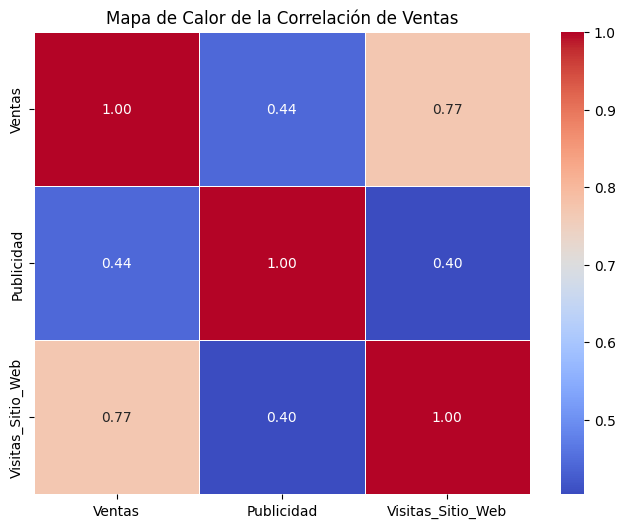

In [ ]:
# --- PASO 2: Generar el Mapa de Calor (Heatmap) ---

plt.figure(figsize=(8, 6)) # Define el tamaño de la figura

# Generamos el heatmap:
sns.heatmap(
    corr_matrix,       # Los datos que se van a graficar (la matriz)
    annot=True,        # Muestra los valores numéricos (coeficientes) en cada celda
    cmap='coolwarm',   # Define la paleta de colores (cool=azul/negativo, warm=rojo/positivo)
    fmt=".2f",         # Formatea los números con dos decimales
    linewidths=.5,     # Agrega líneas entre las celdas para mayor claridad
    cbar=True          # Muestra la barra de color lateral
)

plt.title('Mapa de Calor de la Correlación de Ventas') # Título del gráfico
plt.show() # Muestra la visualización

## 2. Entrenar un modelo lineal para predecir ventas

In [38]:
# dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

## 3. Evaluar el desempeño usando R^2

In [40]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.7316332898843738


## 4. Explicar "qué variable influye más"

In [41]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

print(coeficientes)

             Variable  Coeficiente
0          Publicidad     0.037022
1   Visitas_Sitio_Web     1.314416
2               Mes_2  1419.867900
3               Mes_3  2805.806249
4               Mes_4  2851.419749
5               Mes_5  1605.373396
6               Mes_6  3715.925582
7               Mes_7  2038.124846
8               Mes_8 -1094.501859
9               Mes_9  1594.725144
10             Mes_10    10.552607
11             Mes_11   790.643602
12             Mes_12  8551.781888


Se puede observar claramente que la variable que influye mas en las ventas son las visitas al sitio web, eso es muy notorio en el heatmap como en los coeficientes, tambien se puede notar que hay mas ventas en diciembre, sin embargo, las ventas disminuyen en agosto con respecto al mes base que es enero 